# 1. 📂  Data Loading and Initial Overview

In [2]:
import kagglehub
import pandas as pd

path = kagglehub.dataset_download("laotse/credit-risk-dataset")

df = pd.read_csv(f"{path}/credit_risk_dataset.csv")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted", font_scale=1.1)

In [4]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
df.shape

(32581, 12)

### 1️ 📂 Попередній огляд
Ми завантажили дані та переглянули їхню структуру: кількість рядків/стовпців, типи змінних, перші значення.
<br><br><br><br><br><br>

# 2. 🧹 Перевірка якості даних

In [6]:
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nОпис статистики:")
display(df.describe(include="all"))

Shape: (32581, 12)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581,31686.000000,32581,32581,32581.000000,29465.000000,32581.000000,32581.000000,32581,32581.000000
unique,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,16446,NaN,6453,10777,NaN,NaN,NaN,NaN,26836,NaN
mean,27.734600,6.607485e+04,NaN,4.789686,NaN,NaN,9589.371106,11.011695,0.218164,0.170203,NaN,5.804211
std,6.348078,6.198312e+04,NaN,4.142630,NaN,NaN,6322.086646,3.240459,0.413006,0.106782,NaN,4.055001
min,20.000000,4.000000e+03,NaN,0.000000,NaN,NaN,500.000000,5.420000,0.000000,0.000000,NaN,2.000000
25%,23.000000,3.850000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.900000,0.000000,0.090000,NaN,3.000000
50%,26.000000,5.500000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.990000,0.000000,0.150000,NaN,4.000000
75%,30.000000,7.920000e+04,NaN,7.000000,NaN,NaN,12200.000000,13.470000,0.000000,0.230000,NaN,8.000000


In [7]:
print("\nКількість пропусків по колонках:")
print(df.isnull().sum())


Кількість пропусків по колонках:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [8]:
print("\nКількість дублікатів:", df.duplicated().sum())


Кількість дублікатів: 165


# 2. 🧹 Data Quality Check:

* 🔎 Checked for missing values and duplicates.
* ⚠️ Important to consider before modeling.
<br><br><br><br><br><br>

# 3. 📋 Variable Description
### 👤 Personal Characteristics

- person_age – age of the borrower (years).\
- person_income – annual income of the borrower (in monetary units).\
- person_home_ownership – home ownership status (RENT, OWN, MORTGAGE, OTHER).\
- person_emp_length – employment length (in years).

### 💳 Loan Information

- loan_intent – purpose of the loan (EDUCATION, MEDICAL, VENTURE, PERSONAL, DEBTCONSOLIDATION, HOMEIMPROVEMENT).\
- loan_grade – borrower’s credit grade (from A – best to G – worst).\
- loan_amnt – loan amount.\
- loan_int_rate – loan interest rate (%).\
- loan_percent_income – share of loan to income (loan_amnt / person_income).

### 🏦 Credit History

- cb_person_default_on_file – whether the borrower has previously defaulted (Y/N).\
- cb_person_cred_hist_length – length of credit history (years).

### 🎯 Target Variable

- loan_status – loan status (1 – repaid, 0 – defaulted).

# 4. 📊 Target Variable Distribution

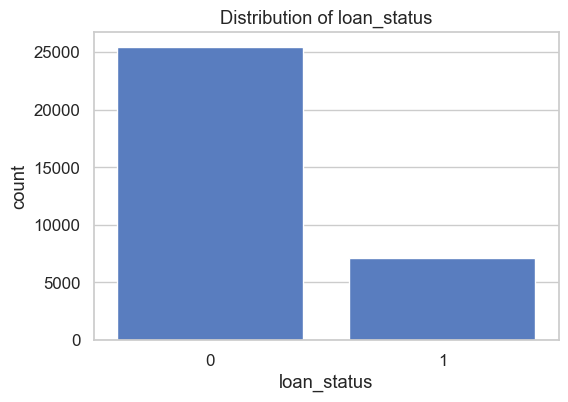

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='loan_status', data=df)
plt.title("Distribution of loan_status")
plt.show()


# 4. 📊 Conclusion:
* The chart shows a partial class imbalance in the **loan_status** variable.
<br><br><br><br><br><br>

# 5. 🔢 Numerical Variables (in Detail)

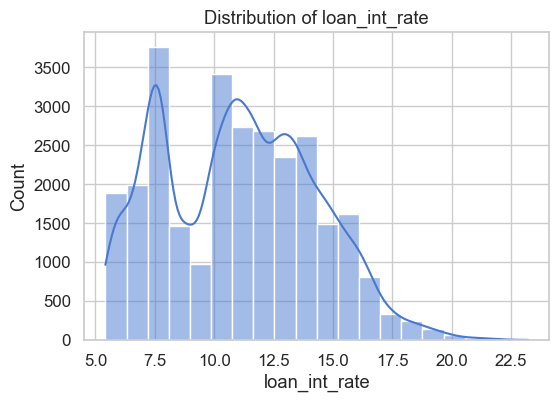

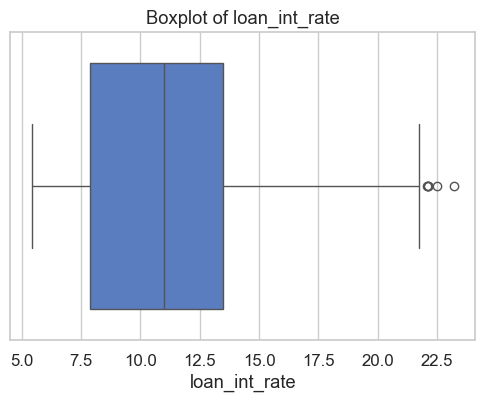

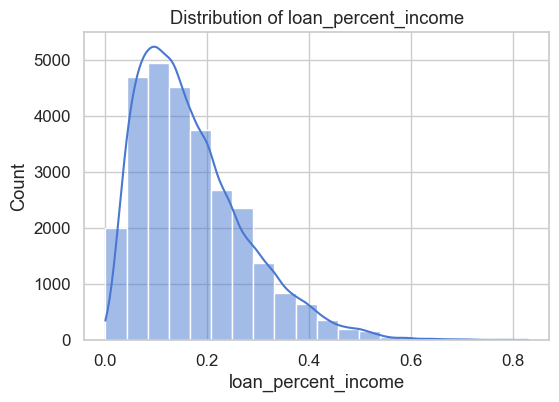

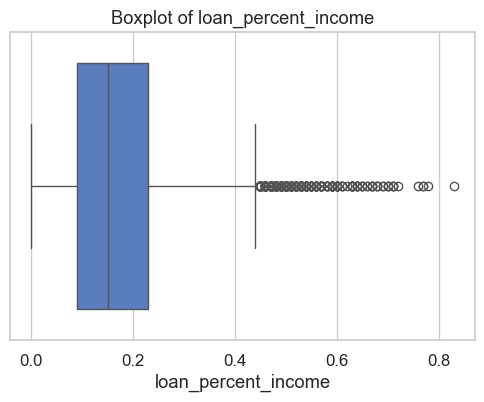

In [36]:
cols = ['loan_int_rate', 'loan_percent_income']

for col in cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), bins=20, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()
    
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


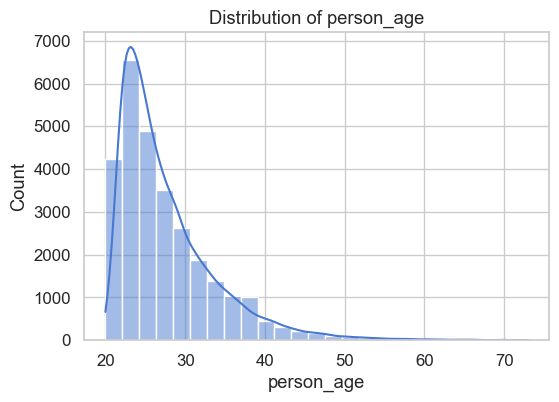

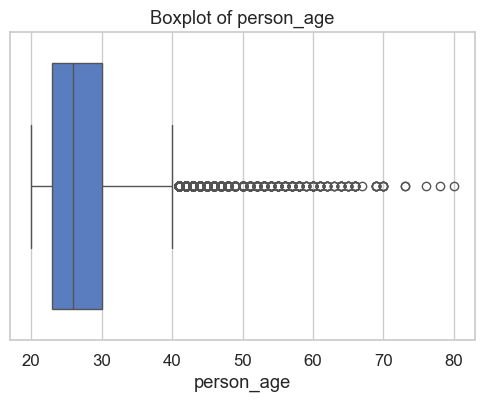

In [37]:
plt.figure(figsize=(6,4))
sns.histplot(df[df['person_age'] < 75]['person_age'], bins=25, kde=True)
plt.title("Distribution of person_age")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['person_age'])
plt.title("Boxplot of person_age")
plt.show()

In [38]:
print("Minimum value of person_age:", df['person_age'].min())
print("Mean value of person_age:", df['person_age'].mean())
print("Maximum value of person_age:", df['person_age'].max())

Minimum value of person_age: 20
Mean value of person_age: 27.710174286612414
Maximum value of person_age: 80


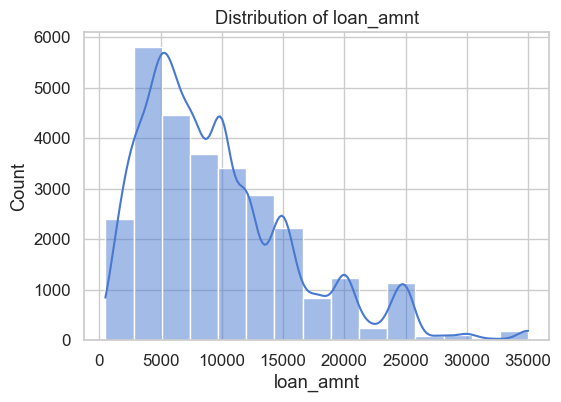

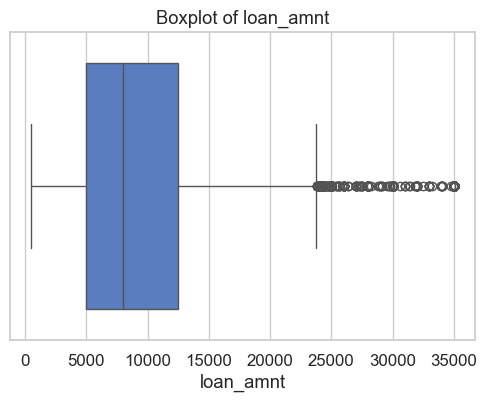

In [39]:
plt.figure(figsize=(6,4))
sns.histplot(df['loan_amnt'].dropna(), bins=15, kde=True)  # adjust bins individually if needed
plt.title("Distribution of loan_amnt")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['loan_amnt'])
plt.title("Boxplot of loan_amnt")
plt.show()

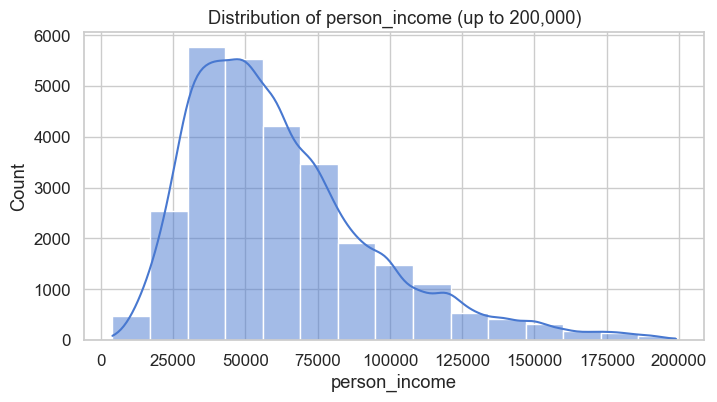

In [40]:
plt.figure(figsize=(8,4))
sns.histplot(df[df['person_income'] < 200000]['person_income'], bins=15, kde=True)
plt.title("Distribution of person_income (up to 200,000)")
plt.xlabel("person_income")
plt.show()


In [41]:
print("Minimum value of person_income:", df['person_income'].min())
print("Mean value of person_income:", df['person_income'].mean())
print("Maximum value of person_income:", df['person_income'].max())

Minimum value of person_income: 4000
Mean value of person_income: 66425.51458209632
Maximum value of person_income: 2039784


# 5️ Numerical Variables (in Detail)

- 📈 Plotted distributions and boxplots for key numerical variables

- 🧮 Displayed minimum, mean, and maximum values for **age** and **income**

- ⚖️ This helps better understand the data scale and potential outliers
<br><br><br><br><br><br>

# 6. 🏷️ Categorical Variables

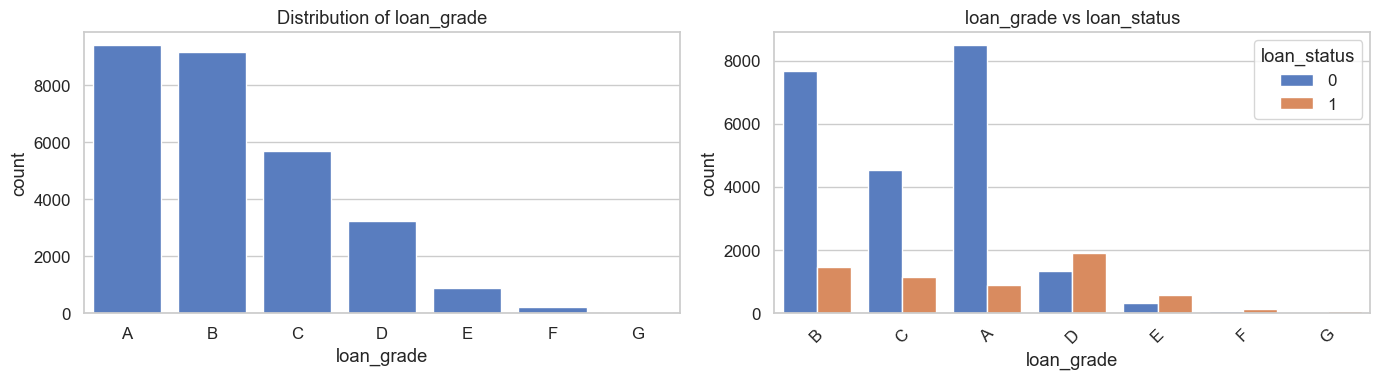

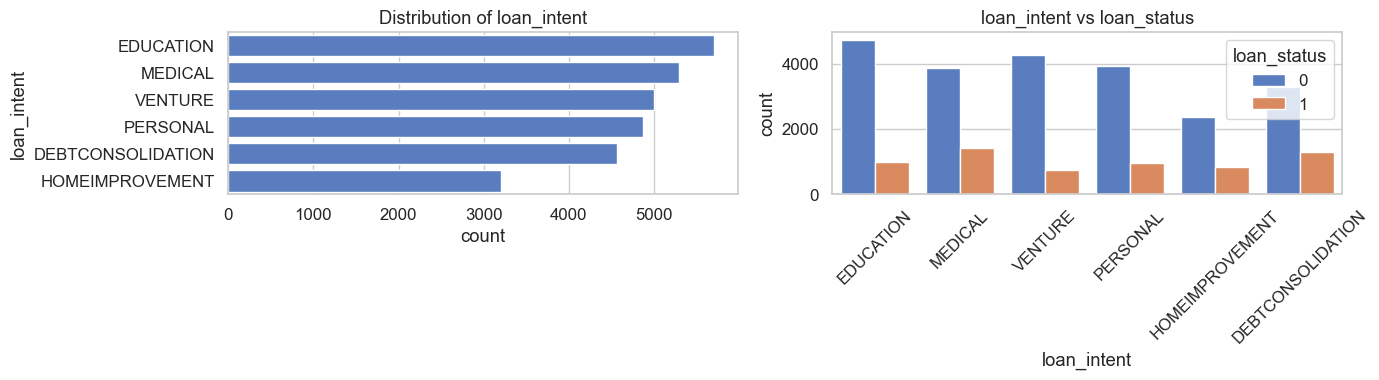

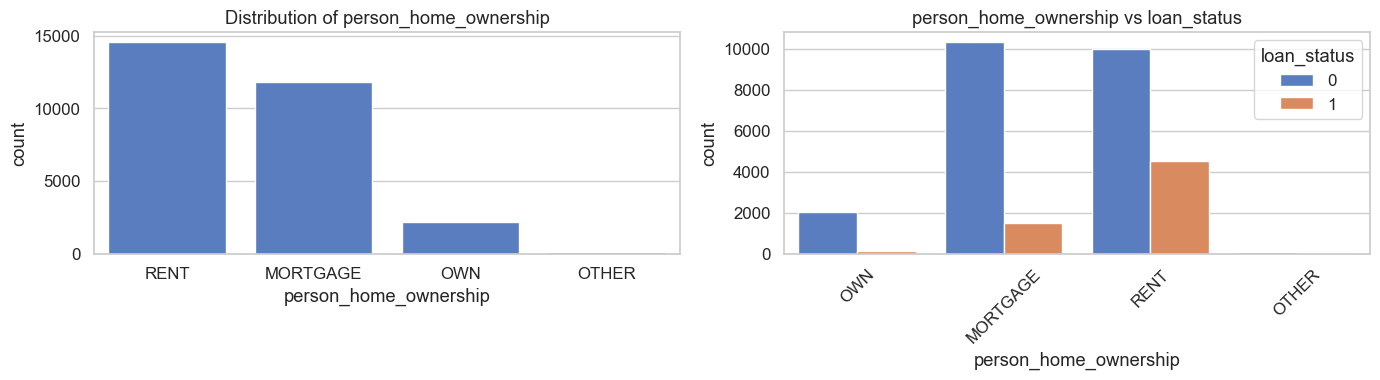

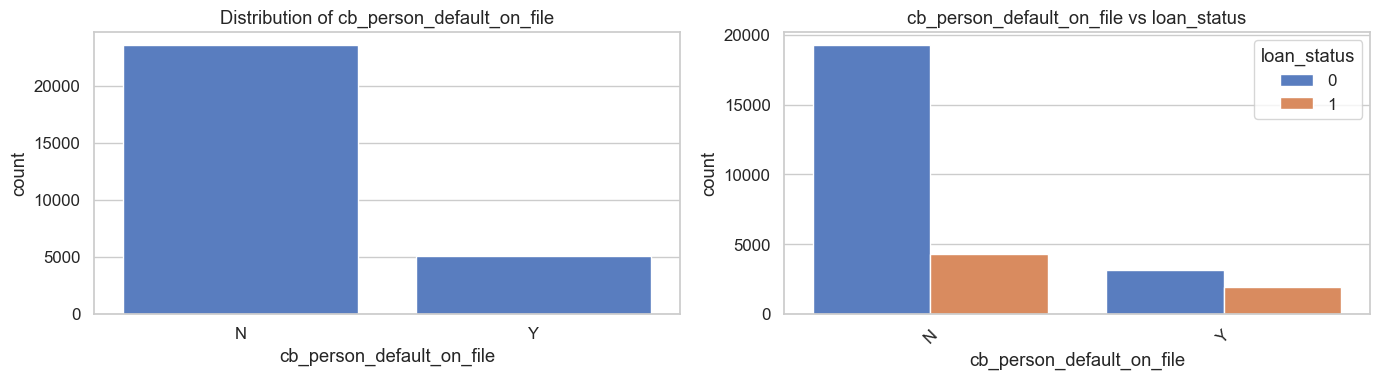

In [44]:
cat_cols = ['loan_grade', 'loan_intent', 'person_home_ownership', 'cb_person_default_on_file']

for col in cat_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14,4))
    
    # 1. Overall distribution
    if df[col].str.len().max() < 10:
        sns.countplot(x=col, data=df, order=df[col].value_counts().index, ax=axes[0])
        axes[0].tick_params(axis='x', rotation=0)
    else:
        sns.countplot(y=col, data=df, order=df[col].value_counts().index, ax=axes[0])
    
    axes[0].set_title(f"Distribution of {col}")
    
    # 2. Distribution by loan_status
    sns.countplot(x=col, hue='loan_status', data=df, ax=axes[1])
    axes[1].set_title(f"{col} vs loan_status")
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()


In [17]:
df['person_home_ownership'].value_counts()

person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

## 6️. Categorical Variables

For each categorical variable, shown:
- 📊 Overall distribution
- 🎯 Relationship with loan_status
<br><br><br><br><br><br>

# 7. 📦 Numerical Variables vs Loan Status

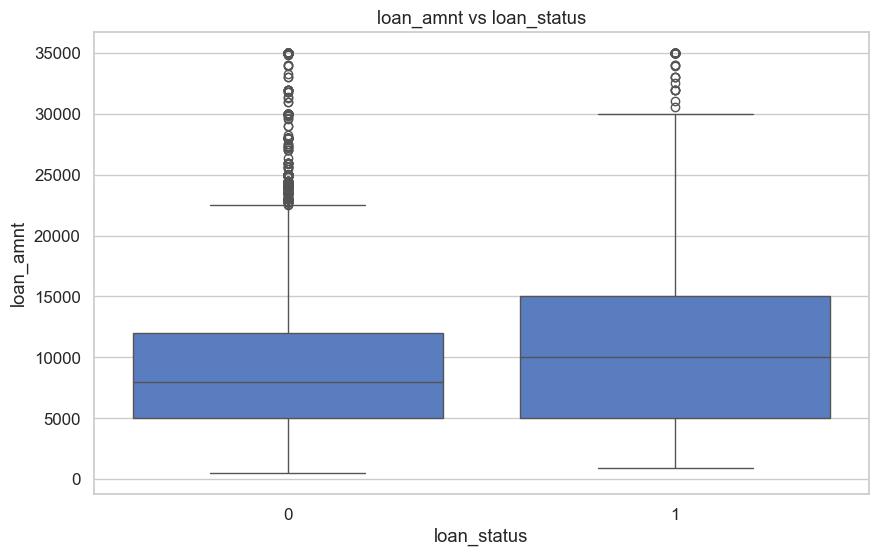

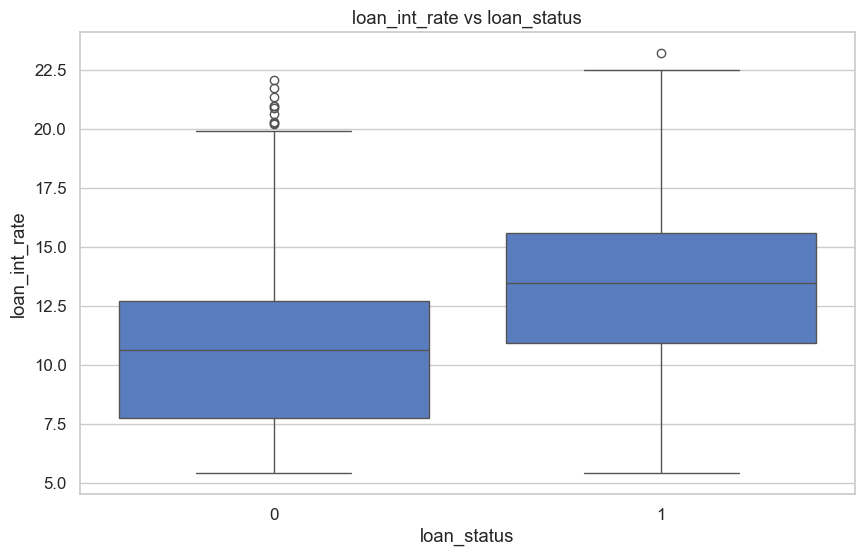

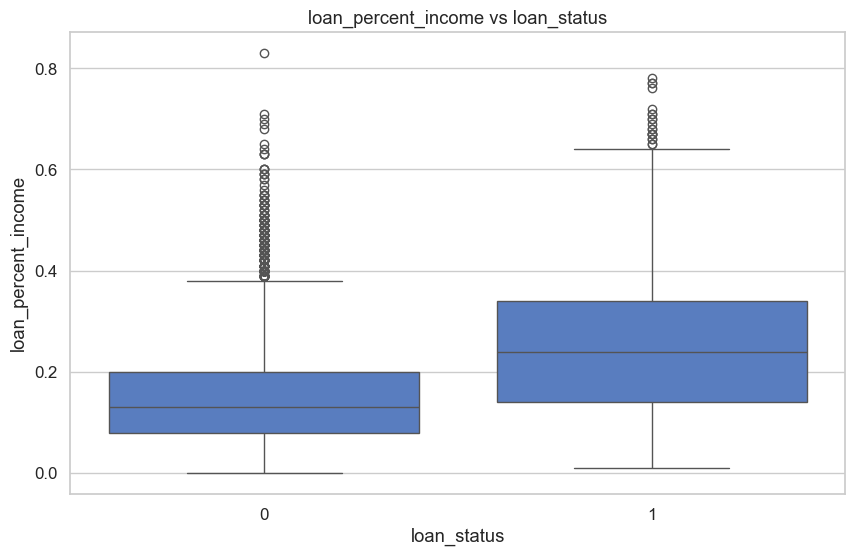

In [45]:
num_cols_smaller = ['loan_amnt', 'loan_int_rate', 'loan_percent_income']

for col in num_cols_smaller:
    plt.figure(figsize=(10,6)) 
    sns.boxplot(x='loan_status', y=col, data=df)
    plt.title(f"{col} vs loan_status")
    plt.show()

## 7️. Numerical Variables vs Target
- 📦 Boxplots show the distribution of loan-related features across **loan_status** classes
<br><br><br><br><br><br>

# 8. 🔗 Correlation Matrix

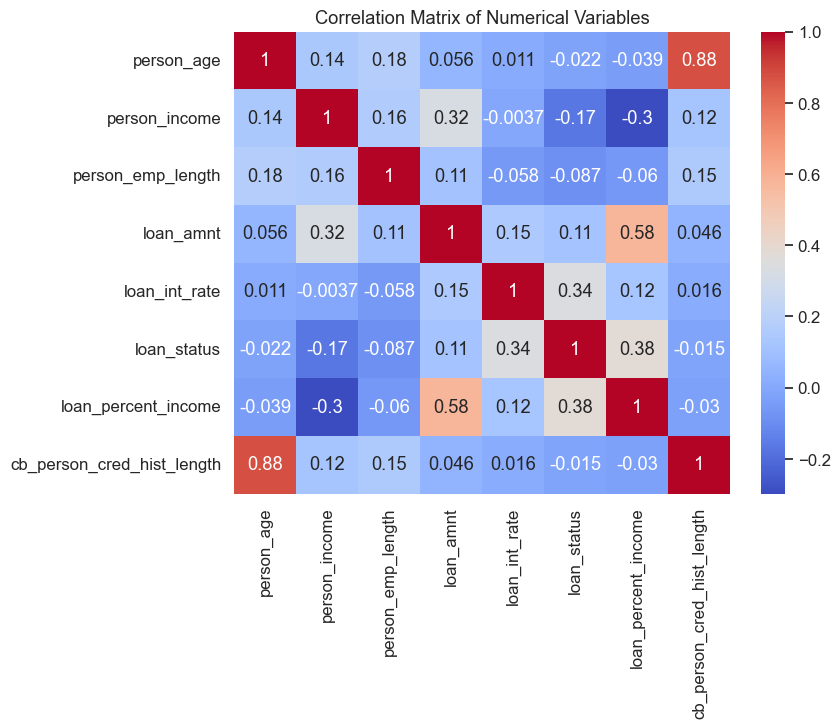

In [46]:
num_cols = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_status',
    'loan_percent_income',
    'cb_person_cred_hist_length'
]

plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Variables")
plt.show()


## 8️. Correlations
- 🔗 The heatmap shows relationships between numerical variables
<br><br><br><br><br><br>

# 9. 📌 Summary

In [47]:
summary = pd.DataFrame({
    'Number of Rows': [df.shape[0]],
    'Number of Columns': [df.shape[1]],
    'Missing Values (Total)': [df.isnull().sum().sum()],
    'Duplicates': [df.duplicated().sum()],
    'Numerical Variables': [len(num_cols)],
    'Categorical Variables': [len(cat_cols)]
})

summary

,Number of Rows,Number of Columns,Missing Values (Total),Duplicates,Numerical Variables,Categorical Variables
0,28631,12,0,137,8,4


## 9️ EDA Conclusions

1. 📂 Explored the data structure, missing values, and duplicates
2. 🎯 Plotted distributions of the target variable
3. 🔢 Analyzed numerical variables in detail
4. 🏷️ Analyzed categorical variables
5. 📦 Assessed relationships between numerical variables and loan_status
6. 🔗 Built a correlation matrix
<br><br>

# Data Cleaning

In [21]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [22]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [23]:
missing_percent = df.isna().mean() * 100
print(missing_percent)

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64


In [24]:
df.duplicated().sum()

np.int64(165)

In [25]:
df = df.dropna()
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [26]:
(df['person_age'].value_counts().values>80).sum()

np.int64(26)

In [27]:
df = df.drop(df[df['person_age'] > 80].index, axis=0)

In [28]:
df.head(7)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3


In [29]:
df = df[df['person_emp_length'] <= 60]

In [30]:
df.reset_index(drop=True, inplace=True)

In [31]:
df['person_home_ownership'].value_counts()

person_home_ownership
RENT        14548
MORTGAGE    11797
OWN          2192
OTHER          94
Name: count, dtype: int64

In [32]:
raw_data = df.copy()

In [33]:
df.shape

(28631, 12)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28631 entries, 0 to 28630
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28631 non-null  int64  
 1   person_income               28631 non-null  int64  
 2   person_home_ownership       28631 non-null  object 
 3   person_emp_length           28631 non-null  float64
 4   loan_intent                 28631 non-null  object 
 5   loan_grade                  28631 non-null  object 
 6   loan_amnt                   28631 non-null  int64  
 7   loan_int_rate               28631 non-null  float64
 8   loan_status                 28631 non-null  int64  
 9   loan_percent_income         28631 non-null  float64
 10  cb_person_default_on_file   28631 non-null  object 
 11  cb_person_cred_hist_length  28631 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.6+ MB


model

In [48]:
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from imblearn.over_sampling import BorderlineSMOTE
from xgboost import XGBClassifier

In [ ]:
# --- 2. Categorical Features ---
cat_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [ ]:
# --- 3. Defining X and y ---
X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']

In [ ]:
# --- 4. Scaling Numerical Features ---
num_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [ ]:
# --- 5. Class Balancing ---
smote = BorderlineSMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
print("Final dimensions of target label classes:", Counter(y_res))

Final dimensions of target label classes: Counter({0: 22429, 1: 22429})


In [ ]:
# --- 6. Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

In [ ]:
# --- 7. XGBoost Model ---
model = XGBClassifier(
    n_estimators=200, 
    max_depth=5, 
    learning_rate=0.1, 
    subsample=0.8, 
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [ ]:
# --- 8. Evaluation ---
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

print("Train ROC AUC:", roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
print("Test ROC AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Train Accuracy: 0.9500919578665775
Test Accuracy: 0.9413731609451628
Train ROC AUC: 0.9855789315481115
Test ROC AUC: 0.9794576389536258

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      4486
           1       0.97      0.91      0.94      4486

    accuracy                           0.94      8972
   macro avg       0.94      0.94      0.94      8972
weighted avg       0.94      0.94      0.94      8972

Confusion Matrix:
 [[4376  110]
 [ 416 4070]]


In [ ]:
# --- 9. 5-fold CV ROC AUC ---
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42);
cv_scores = cross_val_score(model, X_res, y_res, cv=cv, scoring='roc_auc');
print("5-fold CV ROC AUC scores:", cv_scores);
print("Mean CV ROC AUC:", cv_scores.mean());

5-fold CV ROC AUC scores: [0.98235761 0.98130027 0.98007051 0.97854283 0.97964665]
Mean CV ROC AUC: 0.9803835734656492
